In [2]:
import keras

print(keras.__version__)  # 버전확인, 동작확인

2.9.0


In [3]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) # 빈도수 상위 만개만

In [4]:
train_data.shape

(25000,)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
# 숫자를 문자로 복원하는 작업
word_index = imdb.get_word_index()
word_index.items()       # ('Key',value) 한개가 item
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [8]:
# Decoding
# 0 번에 있는 데이터만 뒤집어서 확인
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# reverse_word_index.get(i-3,'?') 찾는 방법 i-3:처음 3개는 특수문자와 같은 필요한 데이터가 아님
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Q. i-3 , ? 의미

In [9]:
# 답변
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [10]:
type(reverse_word_index)

dict

In [11]:
# dict 타입에서 .get(i-3,'?') 없다면 ?로 표현

In [12]:
# One-Hot-Encoding
# 데이터 준비
# 폭 만개짜리 배열 만들기
import numpy as np
# dimension = 10000 (default 값을 설정, 따로 정의되지않으면 dimension은 10000)
def vectorize_sequences(sequences, dimension = 10000): #세로 250000, 가로10000개의 배열 생성
    results = np.zeros((len(sequences),dimension))
    return results

vectorize_sequences(train_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# enumerate 반복가능한 객체를 만들때(인덱스를 만들어낼때 사용가능)
for c in (['A','B','C']):
    print(c)

A
B
C


In [14]:
for c in enumerate(['A','B','C']):
    print(c)

(0, 'A')
(1, 'B')
(2, 'C')


In [15]:
# 인덱스를 따로 분리
for i,c in enumerate(['A','B','C']):
    print(i, c)

0 A
1 B
2 C


In [16]:
# 인덱스 시작값을 1로 시작하고 싶을때
for i,c in enumerate(['A','B','C'], start=1):
    print(i, c)

1 A
2 B
3 C


In [17]:
temp = enumerate(['A','B','C'])
type(temp)

enumerate

In [18]:
temp = enumerate(['A','B','C'])
list(temp)    # list 타입으로 변환

[(0, 'A'), (1, 'B'), (2, 'C')]

In [19]:
temp = enumerate(['A','B','C'])
next(temp)    # 튜플타입의 특징, 한칸씩 넘어감
next(temp)
next(temp)

(2, 'C')

In [20]:
# for문을 이용해서 1넣기
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results
# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [22]:
# float type으로 변환
# 내부적으로 tensor로 변환해야 가능 tensor는 keras의 벡터다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [47]:
# 신경망 구축
from keras import models
from keras import layers
# network or model 이름을 많이 사용함

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # Input layer 만개의 데이터를 받겠다
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #Output layer


In [36]:
# model compile
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy', # 이진분류에 사용하는 로스함수
              metrics = ['accuracy']
              )

In [49]:
# 15000개로 학습과 동시에 10000개로 검증을 하기위해 쪼갬
# 완성도 높은 모델을 만들기 위해
# 완성도 높은 모델은 validation, train, test 세개의 부분으로 나뉨
x_val = x_train[:10000]            # 25000개 중에서 앞부분 10000개만
partial_x_train = x_train[10000:]  # 나머지 15000개 가져옴

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.5720 - accuracy: 0.7381 - val_loss: 0.4508 - val_accuracy: 0.8257
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3534 - accuracy: 0.8937 - val_loss: 0.3319 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2508 - accuracy: 0.9236 - val_loss: 0.2882 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1948 - accuracy: 0.9383 - val_loss: 0.3447 - val_accuracy: 0.8586
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1593 - accuracy: 0.9512 - val_loss: 0.2880 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1331 - accuracy: 0.9595 - val_loss: 0.2828 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1096 - accuracy: 0.9689 - val_loss: 0.2958 - val_accuracy: 0.8855
Epoch 8/20
30

batch_size를 2의 지수로 설정하시는 이유가 있나요?
- 메모리든 컴퓨터의 구성이 2의 지수로 되어있다
국룰

val-accuracy를 보면 3번째가 가장 훌륭한 결과라고 볼수있다.

In [31]:
# history 데이터 가져오기(실험 결과 데이터)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

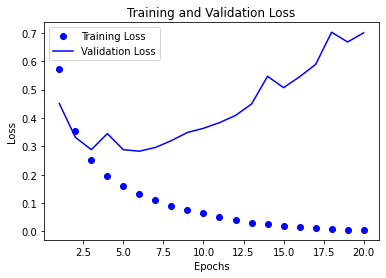

In [33]:
# 실험결과 시각화 (가장 중요하게 봐야하는건 검증 정확도)
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label = 'Training Loss')         # 학습훈련에서의 손실(훈련을 반복할수록 학습데이터에 밀착)
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')   # 
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

몇번 더 실행을 해봐야한다


데이터의 가중치가 어떻게 들어갔는지에 따라
실험을 여러번 해야봐야 한다

초기의 랜덤한 가중치의 영향임


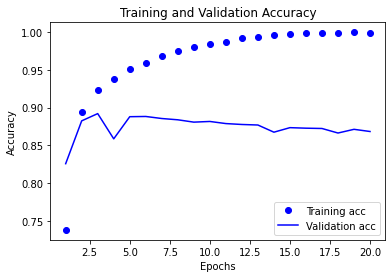

In [34]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

3번 정도의 반복이 최대 최적화인것을 확인했기 때문에

모델을 초기화 시키고 3번정도만 다시 돌려보는 실습

신경망 구축, 모델컴파일, 데이터를 쪼개는 부분을 재실행하여 모델 초기화

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 3,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/3
30/30 [==============================] - 3s 63ms/step - loss: 0.5418 - accuracy: 0.7754 - val_loss: 0.4196 - val_accuracy: 0.8586
Epoch 2/3
30/30 [==============================] - 2s 68ms/step - loss: 0.3334 - accuracy: 0.9003 - val_loss: 0.3212 - val_accuracy: 0.8844
Epoch 3/3
30/30 [==============================] - 2s 51ms/step - loss: 0.2420 - accuracy: 0.9256 - val_loss: 0.2851 - val_accuracy: 0.8902


In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

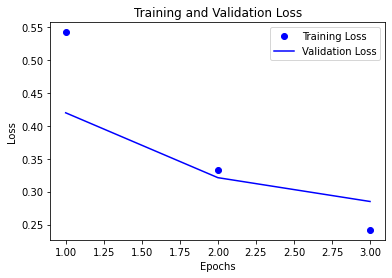

In [40]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')         # 학습훈련에서의 손실(훈련을 반복할수록 학습데이터에 밀착)
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')   # 
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

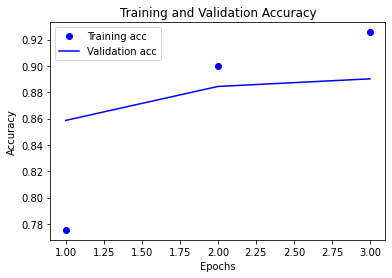

In [41]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
# Overfitting 너무 과도한 학습으로 제대로 된 검증이 안되기 때문에 학습을 제어 하기위해 컴파일 수정
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #'rmsprop'
              loss = 'binary_crossentropy', # 이진분류에 사용하는 로스함수
              metrics = ['accuracy']
              )

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5344 - accuracy: 0.7702 - val_loss: 0.4085 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3281 - accuracy: 0.9001 - val_loss: 0.3229 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2404 - accuracy: 0.9234 - val_loss: 0.2846 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1856 - accuracy: 0.9414 - val_loss: 0.2998 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1525 - accuracy: 0.9542 - val_loss: 0.2746 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1242 - accuracy: 0.9617 - val_loss: 0.2846 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1029 - accuracy: 0.9695 - val_loss: 0.3326 - val_accuracy: 0.8768
Epoch 8/20
30

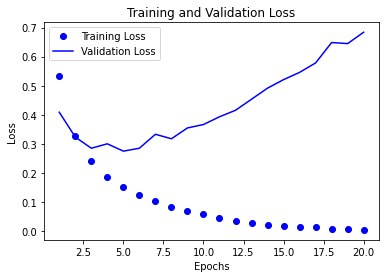

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')         
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')   
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

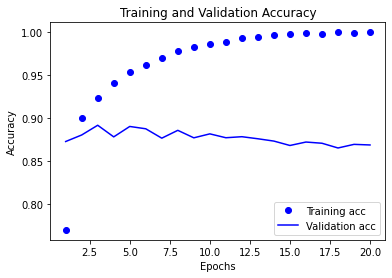

In [53]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()